# Global Alignment
Implement [Needleman–Wunsch](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm) algorithm for Global Pairwise sequence alignment.  
It's time and space complexity is `O(mn)`.

In [6]:
import pandas as pd

from Bio import pairwise2
from Bio.SubsMat.MatrixInfo import blosum62
from Bio import SeqIO
from Bio.Seq import Seq

from Bio.SubsMat import SeqMat

In [2]:
# seq1 = SeqIO.read("inputs/alpha.faa", "fasta")
# seq2 = SeqIO.read("inputs/beta.faa", "fasta")
# alignments = pairwise2.align.globalds(seq1.seq, seq2.seq, blosum62, -10, -0.5)

In [16]:
seq1 = Seq("CAT")
seq2 = Seq("CART")

In [17]:
data = {('C', 'C'): 3,
 ('A', 'A'): 6,
 ('A', 'C'): -1,
 ('A', 'T'): -1,
 ('A', 'R'): -2,
 ('T', 'C'): -1,
 ('R', 'T'): -3,
 ('T', 'T'): -2,
 ('R', 'R'): -2,
 ('C', 'R'): -2}

In [18]:
submat = SeqMat(data)

In [19]:
alignments = pairwise2.align.globalds(seq1, seq2, submat, -10, -0.5)

In [21]:
print(pairwise2.format_alignment(*alignments[0]))

CA-T
|| |
CART
  Score=-3



In [44]:
df = pd.read_csv("inputs/score_matrix_small.csv", header=0, index_col=0)
df

,A,B,C,D,E,F
A,5,NaN,NaN,NaN,NaN,NaN
B,-2,5.0,NaN,NaN,NaN,NaN
C,-2,-2.0,5.0,NaN,NaN,NaN
D,-2,-2.0,-2.0,5.0,NaN,NaN
E,-2,-2.0,-2.0,-2.0,5.0,NaN
F,-2,-2.0,-2.0,-2.0,-2.0,5.0


In [45]:
data = df.stack().to_dict()
data

{('A', 'A'): 5.0,
 ('B', 'A'): -2.0,
 ('B', 'B'): 5.0,
 ('C', 'A'): -2.0,
 ('C', 'B'): -2.0,
 ('C', 'C'): 5.0,
 ('D', 'A'): -2.0,
 ('D', 'B'): -2.0,
 ('D', 'C'): -2.0,
 ('D', 'D'): 5.0,
 ('E', 'A'): -2.0,
 ('E', 'B'): -2.0,
 ('E', 'C'): -2.0,
 ('E', 'D'): -2.0,
 ('E', 'E'): 5.0,
 ('F', 'A'): -2.0,
 ('F', 'B'): -2.0,
 ('F', 'C'): -2.0,
 ('F', 'D'): -2.0,
 ('F', 'E'): -2.0,
 ('F', 'F'): 5.0}

In [89]:
seq1 = Seq("FACEDCAFFE")
seq2 = Seq("ACEDFACEDFACED")

In [90]:
submat = SeqMat(data)

In [91]:
gop = -10; gep = -0.5
alignments = pairwise2.align.globalds(seq1, seq2, submat, gop, gep)

In [92]:
print(pairwise2.format_alignment(*alignments[0]))

----FACEDCAFFE
    |||||.|...
ACEDFACEDFACED
  Score=10.5



In [93]:
x = alignments[0][0]

In [94]:
y = alignments[0][1]

In [95]:
import matplotlib.pyplot as plt

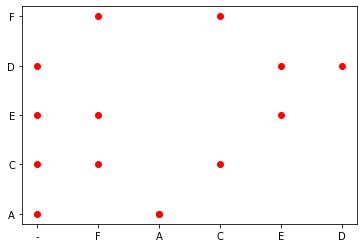

In [96]:
plt.plot(list(x), list(y), "ro")